In [123]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom.utils import pickle_load

from lagom.vis import CurvePlot

In [134]:
log_folder = Path('logs.init_std')

list_config = pickle_load(log_folder/'configs.pkl')
configs = Configurator.to_dataframe(list_config)
configs

,ID,cuda,env.id,env.standardize,network.recurrent,network.hidden_sizes,algo.lr,algo.use_lr_scheduler,algo.gamma,algo.gae_lambda,...,train.timestep,train.N,train.ratio_T,eval.independent,eval.N,train.batch_size,train.num_epochs,log.record_interval,log.print_interval,log.dir
0,0,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
1,1,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
2,2,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
3,3,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
4,4,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
5,5,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
6,6,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
7,7,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
8,8,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std
9,9,True,HalfCheetah-v2,True,False,"[64, 64]",0.0003,True,0.99,0.97,...,1000000.0,4,0.2,True,10,64,80,10,10,logs.init_std


In [135]:
def load_results(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/f).exists():
            list_result.append(pickle_load(sub/f))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        #x_values = [i['evaluation_iteration'][0] for i in result]
        x_values = [i['accumulated_trained_timesteps'][0] for i in result]
        y_values = [i['average_return'][0] for i in result]
        returns.append([x_values, y_values])
        
    return returns


In [136]:
ID = 0
env_id = configs.loc[configs['ID'] == ID]['env.id'].values[0]

plot = CurvePlot()

In [137]:
for ID, x in enumerate(configs['agent.init_std']):
    list_result = load_results('logs.init_std', ID, 'eval_logs.pkl')
    returns = get_returns(list_result)
    x_values, y_values = zip(*returns)
    plot.add(f'PPO - init_std - {x}', y_values, xvalues=x_values)

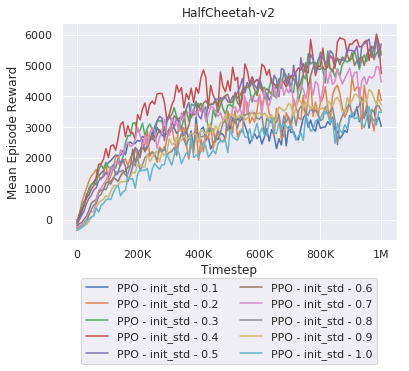

In [140]:
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=f'{env_id}', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[0.1], 
          alphas=[0.1])
ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)

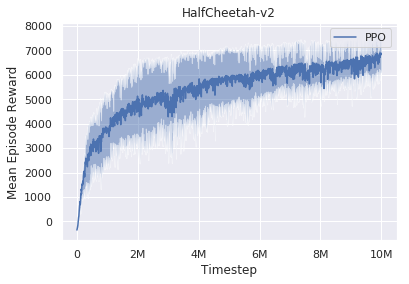

In [116]:
plot = CurvePlot()
plot.add('PPO', y_values, xvalues=x_values)
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=env_id, 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

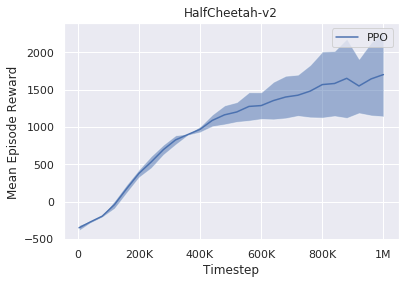

In [107]:
plot = CurvePlot()
plot.add('PPO', y_values, xvalues=x_values)
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=env_id, 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

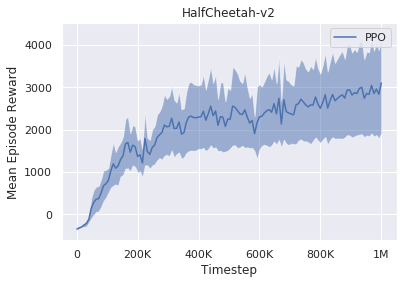

In [99]:
plot = CurvePlot()
plot.add('PPO', y_values, xvalues=x_values)
#plot.add('PPO', [f(y, window_length=51, polyorder=10) for y in y_values], xvalues=x_values)
ax = plot(title=env_id, 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

In [100]:
list_result = load_results('old_logs', ID, 'eval_logs.pkl')
returns = get_returns(list_result)
x_values, y_values = zip(*returns)
plot.add('PPO - old', y_values, xvalues=x_values)

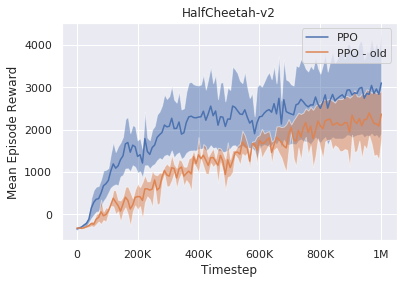

In [101]:
ax = plot(title=env_id, 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)

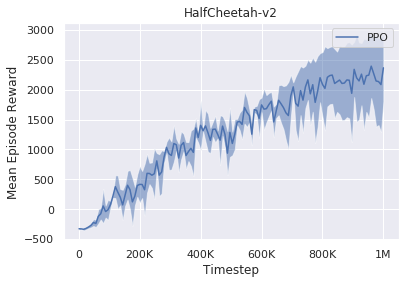

In [67]:
env = make_vec_env(SerialVecEnv, make_gym_env, 'LunarLanderContinuous-v2', 3, 0)
env_spec = EnvSpec(env)
env_spec

<EnvSpec, <SerialVecEnv: LunarLanderContinuous-v2, n: 3>>
	Number of environments: 3
	Observation space: Box(8,)
	Action space: Box(2,)
	Control type: Continuous
	T: 1000
	Max episode reward: 200
	Reward range: (-inf, inf)
	Is VecEnv: True

In [78]:
from lagom.transform import SmoothFilter

f = SmoothFilter()